In [84]:
import numpy as np
import matplotlib.pyplot as plt
rnd_rng = np.random.default_rng(2025)
from scipy.stats import gaussian_kde, norm

plt.rcParams['svg.fonttype'] = 'none'
from matplotlib_inline.backend_inline import set_matplotlib_formats

# Set the desired output format
set_matplotlib_formats('svg')

from tol_colors import tol_cmap, tol_cset
cmap = tol_cset('bright')

In [85]:
data = rnd_rng.uniform(0, 1, 1000)

kde = gaussian_kde(data, bw_method='silverman')
h = kde.factor # The bandwidth

sigma = data.std()

def kernel_pdf_raw(x):
    x = np.atleast_1d(x)  # Ensure x is an array
    pdf_values = np.mean(norm.pdf(x[:, None], loc=data, scale=h * sigma), axis=1)
    if pdf_values.size == 1:  # Check if the result is a single value
        return pdf_values.item()  # Convert single-element array to scalar
    return pdf_values

def kernel_pdf_reflect(x):
    x = np.atleast_1d(x)  # Ensure x is an array
    pdf_reflect_values = kernel_pdf_raw(x) + kernel_pdf_raw(-x) + kernel_pdf_raw(2 - x)
    if np.isscalar(pdf_reflect_values):  # Check if the result is scalar
        return pdf_reflect_values
    return pdf_reflect_values

def kernel_pdf_left(x):
    x = np.atleast_1d(x)  # Ensure x is an array
    pdf_reflect_values = kernel_pdf_raw(-x)
    if np.isscalar(pdf_reflect_values):  # Check if the result is scalar
        return pdf_reflect_values
    return pdf_reflect_values

def kernel_pdf_right(x):
    x = np.atleast_1d(x)  # Ensure x is an array
    pdf_reflect_values = kernel_pdf_raw(2-x)
    if np.isscalar(pdf_reflect_values):  # Check if the result is scalar
        return pdf_reflect_values
    return pdf_reflect_values

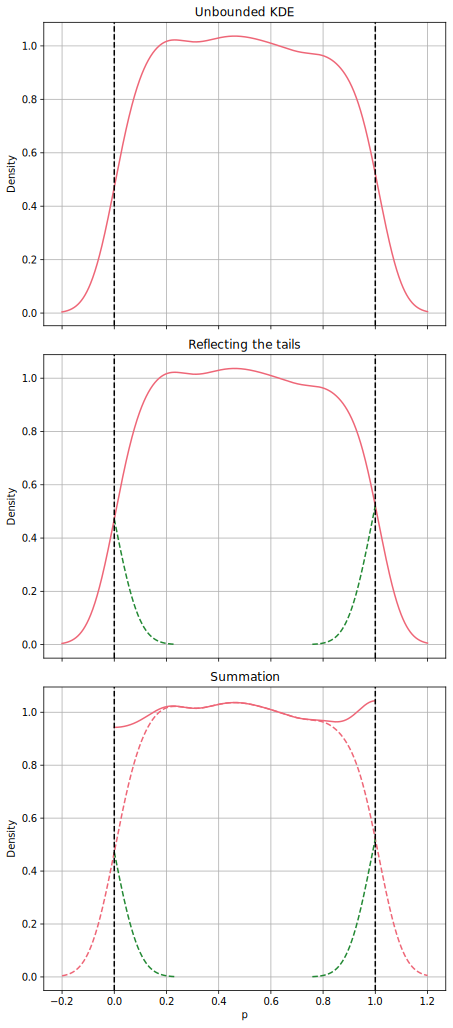

In [87]:
xrange = np.linspace(-0.2, 1.2, endpoint=True, num=1000)
tol = 1.0e-3
mid_col = cmap[1]

refl_range = np.linspace(0.0, 1.0, endpoint=True, num=1000)
refl_col = cmap[2]

bounds_col = cmap[-1]

left = kernel_pdf_left(refl_range)
idx_left = np.where(left > tol)[0]

right = kernel_pdf_right(refl_range)
idx_right = np.where(right > tol)[0]

mid = kernel_pdf_raw(xrange)
idx_mid = np.where(mid > tol)[0]

fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(6.4, 4.8 * 3))

axs[0].plot(
    xrange[idx_mid],
    mid[idx_mid],
    color=mid_col
)
axs[0].axvline(0, color=bounds_col, linestyle='--')
axs[0].axvline(1, color=bounds_col, linestyle='--')
axs[0].grid()
axs[0].set_title('Unbounded KDE')
axs[0].set_ylabel('Density')


axs[1].plot(
    xrange[idx_mid],
    mid[idx_mid],
    color=mid_col
)

axs[1].plot(
    refl_range[idx_left],
    left[idx_left],
    color=refl_col,
    linestyle='--'
)

axs[1].plot(
    refl_range[idx_right],
    right[idx_right],
    color=refl_col,
    linestyle='--'
)
axs[1].axvline(0, color=bounds_col, linestyle='--')
axs[1].axvline(1, color=bounds_col, linestyle='--')
axs[1].grid()
axs[1].set_title('Reflecting the tails')
axs[1].set_ylabel('Density')


axs[2].plot(
    xrange[idx_mid],
    mid[idx_mid],
    color=mid_col,
    linestyle='--'
)

axs[2].plot(
    refl_range[idx_left],
    left[idx_left],
    color=refl_col,
    linestyle='--'
)

axs[2].plot(
    refl_range[idx_right],
    right[idx_right],
    color=refl_col,
    linestyle='--'
)
axs[2].plot(
    refl_range,
    kernel_pdf_reflect(refl_range),
    color=mid_col
)
axs[2].axvline(0, color=bounds_col, linestyle='--')
axs[2].axvline(1, color=bounds_col, linestyle='--')
axs[2].grid()
axs[2].set_xlabel(r'$p$')
axs[2].set_title('Summation')
axs[2].set_ylabel('Density')
fig.tight_layout()

fig.savefig('reflection_method.pdf')